<a href="https://colab.research.google.com/github/RaffaeleBini/Machine_Learning/blob/main/Progetto_Finale_Data_Science_di_Raffaele_Bini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Final Project - Food

This Project covers the final assignment along the learning path of the Master in Data Science in Start2Impact University. This work consists in the development of a full and comprehensive Data Science Project, covering the Data Preparation and Feature Engineering, the Exploratory Data Analysis, the Preprocessing of the Data, the development of the Machine Learning models and the validation and evaluation.

The reference Data Set contains some analytical parameters of sampled waters and the related result in terms of Potability; the aim of the project is to develop a Model to classify the samples in potable or not poteble, taking in input the analytical parameter to predict the potability.

**Note**: considering that the Data Set is in English, I have tried to develop the Project in English.

## Index of contents

- [1. Data Set loading and reading](#1)
- [2. Feature Engineering and Data Preparation](#2)
- [3. Exploratory Data Analysis](#3)
- [4. Data Preparation for modeling](#4)
- [5. Model development and evaluation](#5)
- [6. Conclusions](#6)

<a id="1"> </a>

## 1. Data Set loading and reading

In [ ]:
# Connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libreries for Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Dataset and create a Pandas DataFrame
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/water_potability.csv')

In [ ]:
# DataFrame visualisation
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

<a id="2"> </a>

## 2. Feature Engineering and Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# View statistical summary
df.describe().transpose()

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

This DataFrame contains **10 Columns**, 9 of which have a float type and 1 has an integer type.

**Features**: 9 columns represent the Features and consist of the analythical parameters related to water samples:

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.

**Label**: the last column contains the Label, with 2 possible Classes:

- Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

Looking at the Info and the Statistical summary, it results that:
- some of the Features has **missing values**: it is necessary to define how to manage them;
- comparing the Features, there are values with **different scale**: it is necessary to take it into account during the model development. Maybe the Data should be scaled, depending from the choosen algorythm.

Let's see first how to deal with the missing values.


### Missing Values
Some of the Features has **missing values**: let's see in deeper details.

In [ ]:
# chack for null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# check for the relevance of the null values
100 * df.isnull().sum() / len(df)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

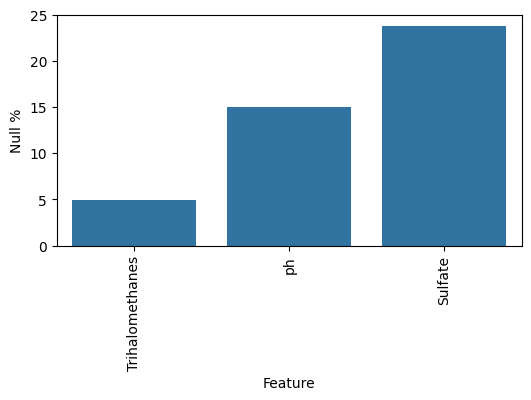

In [ ]:
# Create a plot for a better visualisation
# Define a function to create a sub DataFrame with the missing values
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

percent_nan = percent_missing(df)

# Plot the Data
plt.figure(figsize=(6,3))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Null %")
plt.show()

For 3 of the Features, the nulle values are quite relevant:
- ph: around 15%;
- Sulfate: around 24%
- Trihalomethanes: around 5%.

This is something to take into consideration for the further analysis; it also requires a deeper evaluation in order to better understand if there could be values equal to 0, if there are actual missing values, if it could be possible to assign them a valuo or it could be better to do some other action. I will go back to this point after an Exploratory Data Analysis, to decide what to do.

Let's go deeper into the DataFrame.

To have a more clear idea about the impact of the missing values, I first start to check if there are rows where all the tre 'null-affected' features are missing.

In [ ]:
# check rows where all the 3 values are mising
threenullsrow = df.loc[df.isnull().sum(1)>2].index
len(threenullsrow)

9

There are 9 rows where all the 3 features values are missing.

In [ ]:
# evaluate the impact on the total DataFrame
100 * len(threenullsrow) / len(df)

0.27472527472527475

The impact of these 9 rows on the total DataFrame is around 0.27&, so I consider reasonable the assumption to eliminate them.

In [ ]:
# drop the row with 3 missing values
df = df.drop(df.loc[df.isnull().sum(1)>2].index)

In [ ]:
# chack again for null values
df.isnull().sum()

ph                 482
Hardness             0
Solids               0
Chloramines          0
Sulfate            772
Conductivity         0
Organic_carbon       0
Trihalomethanes    153
Turbidity            0
Potability           0
dtype: int64

I consider now the case of two missing features in the same row.

In [ ]:
# check rows where 2 values are mising
twonullsrow = df.loc[df.isnull().sum(1)>1].index
len(twonullsrow)

151

In [ ]:
# evaluate the impact on the total DataFrame
100 * len(twonullsrow) / len(df)

4.621977349250076

The rows with two missing values are around the 4.6% of the total DataFrame: I don't consider it reliable to eliminate them immediately and before deciding what to do, it is worth carrying out a more in-depth analysis of these features.

Let's make some consideration in order to better understand the null values inside the scope of the three 'null-affected' features:

- **ph**: a '0' value in ph means to deal with the strongest acid. Considering that the Data refer to water samples, I am quite confident to assume that it is not the case: so, probably the null values are not '0' but actually missing informations.

- **Sulfate**: concerning the composition of the water, this value could theorically be 0, meaning an absence of sulfate, but it is unlike ([linee guida del Ministero della Salute](https://www.salute.gov.it/portale/temi/documenti/acquepotabili/parametri/SOLFATO.pdf)) . It is useful to remember that the Sulfates are ions that contribute to the total salinity of the water and so, it could be useful to verify the correlations between Sulfate and other Featurs and verify if it is possible to interpolate the missing values.

- **Trihalomethanes**: Trihalomethanes are the result of a reaction between the chlorine used for disinfecting tap water and natural organic matter in the water; also in this case, it is unlike that this value was 0 ([linee guida del Ministero della Salute](https://www.salute.gov.it/portale/temi/documenti/acquepotabili/parametri/TRIALOMETANI.pdf)). Once again, it could be useful to verify the correlation between Trihalomethanes and Chloraminnes and interpolate the missing values.



#### Sulfate

In [ ]:
# check correlation between Sulfate and others Features
df.corr()['Sulfate'].sort_values()

Solids            -0.150178
Hardness          -0.092854
Trihalomethanes   -0.025605
Potability        -0.020640
Conductivity      -0.014085
Turbidity         -0.009798
ph                 0.015767
Chloramines        0.023816
Organic_carbon     0.026942
Sulfate            1.000000
Name: Sulfate, dtype: float64

There are not strong correlations with the other features, so it is not possible to make some interpolation of the Sulfate values on the basis of another feature. Let's explore another way: just replace the null value with the mean value.



In [ ]:
# calculate the Mean value of the Sulfate
df['Sulfate'].mean()

333.7757766108135

In [ ]:
# replace the null values with the mean value
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())

In [ ]:
# check the Sulfate column for null
df['Sulfate'].isnull().sum()

0

In [ ]:
# chack again for total null values
df.isnull().sum()

ph                 482
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    153
Turbidity            0
Potability           0
dtype: int64

#### Trihalomethanes

In [ ]:
# check correlation between Trihalomethanes and others Features
df.corr()['Trihalomethanes'].sort_values()

Sulfate           -0.025605
Turbidity         -0.021519
Organic_carbon    -0.012992
Hardness          -0.012702
Solids            -0.008895
Conductivity       0.001257
ph                 0.003249
Potability         0.006967
Chloramines        0.016644
Trihalomethanes    1.000000
Name: Trihalomethanes, dtype: float64

Also in this case, the correlations with the other Features (included Chloramines) are not so strong to suggest an interpolation of the Trihalomethanes values. I will proceed following the same way as for Sulfate, replacing the null values with the mean value.

In [ ]:
# calculate the Mean value of the Trihalomethanes
df['Trihalomethanes'].mean()

66.39629294676803

In [ ]:
# replace the null values with the mean value
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [ ]:
# check the Sulfate column for null
df['Trihalomethanes'].isnull().sum()

0

In [ ]:
# chack again for total null values
df.isnull().sum()

ph                 482
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

#### ph
Let's start evaluating the correlations between ph and other Features.

In [ ]:
# check correlation between ph and others Features
df.corr()['ph'].sort_values()

Solids            -0.089288
Turbidity         -0.039057
Chloramines       -0.034350
Potability        -0.003556
Trihalomethanes    0.003249
Sulfate            0.015767
Conductivity       0.018614
Organic_carbon     0.043503
Hardness           0.082096
ph                 1.000000
Name: ph, dtype: float64

There are no relevant correlations between ph and the other features: so, it is not possible to interpolate values following a correlation.

Let's explore the ph distribution visually through a distribution plot to look for some insight.

<Figure size 800x500 with 0 Axes>

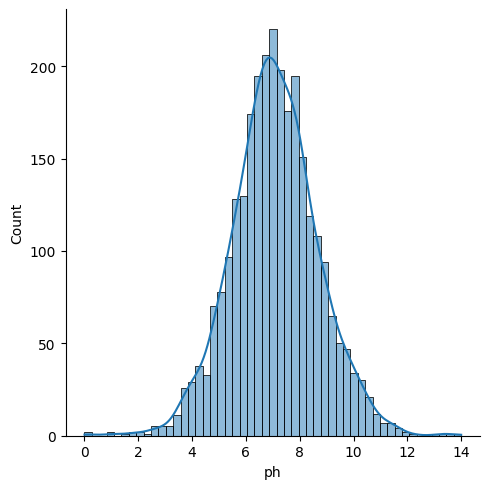

In [ ]:
# plot the distribution graph
plt.figure(figsize=(8,5))
sns.displot(df, x='ph', kde=True)
plt.show()

The graph shows that the distribution of ph values is **gaussian**: due to this, I will proceed to fill the missing values with a series of random point normally distributed with the same mean and standaerd deviation.

In [ ]:
# define the parameters for the normally distributed series to be generated
size = len(df[df['ph'].isnull()].index)
mi = df['ph'].mean()
sigma = df['ph'].std()

# set a seed for reproducibility
np.random.seed(42)

# create a series with normal values
phvalues = np.random.normal(mi, sigma, size)

In [ ]:
# replace the null values with the normal series
index = df[df['ph'].isnull()].index
df['ph'] = df['ph'].fillna(pd.Series(phvalues, index=index))

In [ ]:
# chack again for total null values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Now that all the null values have been managed, it is timo to deal with the Outliers.

### Check for Outliers
**Note** I prefer to perform the check for the Outliers at this stage preliminarly, before to split the Data Set into Train and Test Sets; this is because I prefer to have reliable and representative Data before to split them.

For a quick first evaluation of the possible presence of Outliers, it is useful to visualise the **Box Plots**.

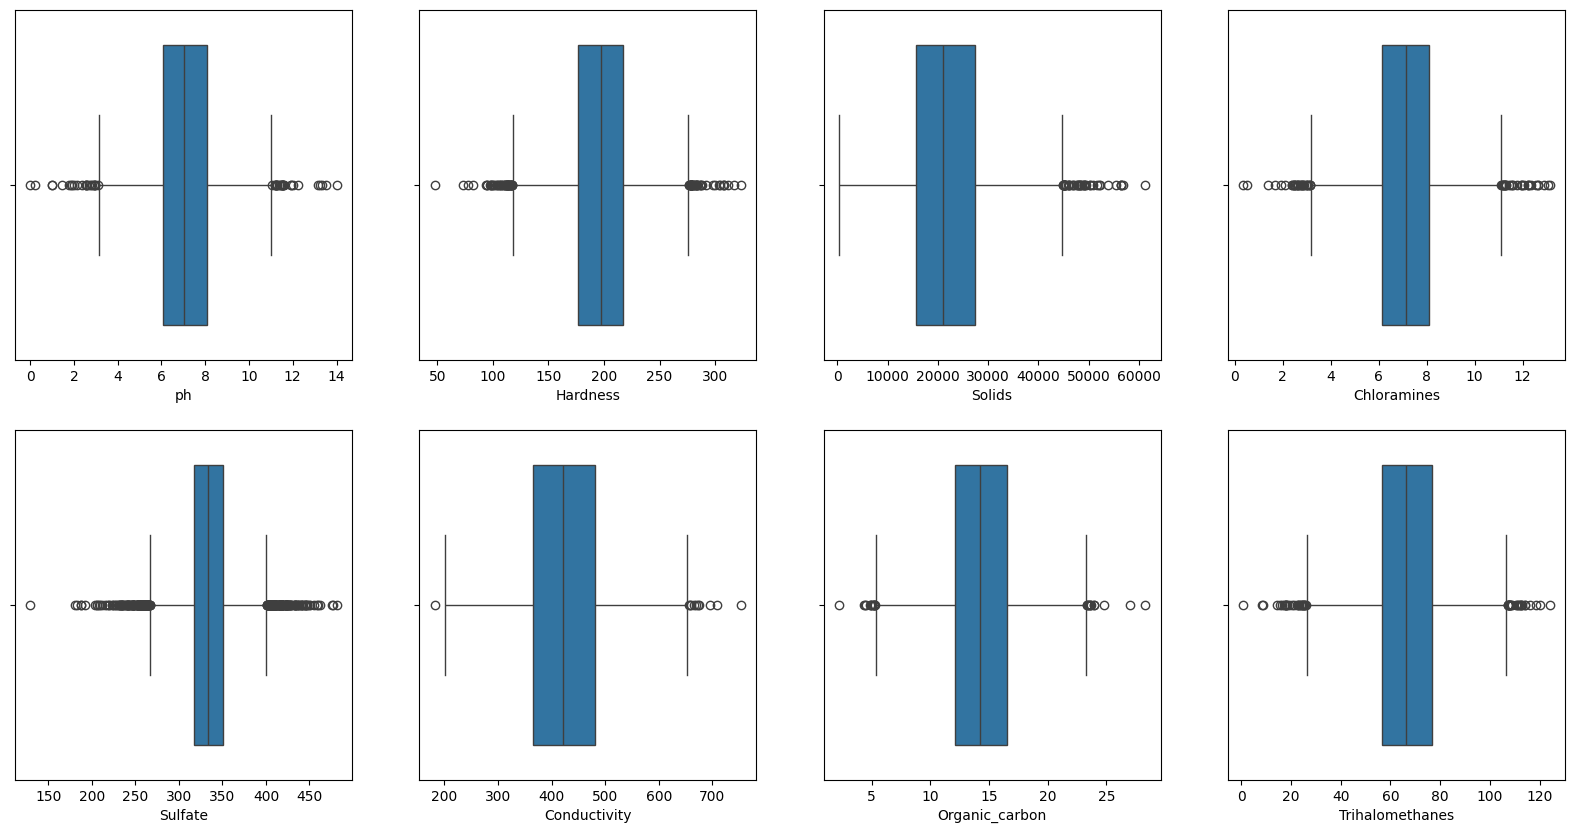

In [ ]:
# Box Plots visualisation
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(ax=axes[0, 0], data=df, x='ph')
sns.boxplot(ax=axes[0, 1], data=df, x='Hardness')
sns.boxplot(ax=axes[0, 2], data=df, x='Solids')
sns.boxplot(ax=axes[0, 3], data=df, x='Chloramines')
sns.boxplot(ax=axes[1, 0], data=df, x='Sulfate')
sns.boxplot(ax=axes[1, 1], data=df, x='Conductivity')
sns.boxplot(ax=axes[1, 2], data=df, x='Organic_carbon')
sns.boxplot(ax=axes[1, 3], data=df, x='Trihalomethanes')

plt.show()

The box plots show that each Feature have some points out from the Interquartile Range; let's make some hypotesis concerning the Outliers.

In order to **identify and remove the Outliers** for each Feature, I follow the way to cap them based off the Interquartiles Range (IQR), considering the 1.5 multiple of the IQR as a suitable limits (upper and lower) to trim the outliers.

First, it is necessary to calculate:
- the IQR lower limit as the q1 minus a 1.5 multiple of the IQR;
- the IQR upper limit as the q3 plus a 1.5 multiple of the IQR;

and then it will be possible to select the points that lie outside the lower range and upper range IQR region and remove them.

The idea is to remove the outliers from the DataFrame using the IQR * 1.5 rule; then, by iterating through every column, identify the points outside of the IQR based limits and exlude them, creating a new filtered DataFrame.


In [ ]:
# Removing the outliers
# define a function that calculates the IQR, defines the interval of the outliers and identify the non outliers
def remove_outliers(df, col):
    q3 = np.quantile(df[col], 0.75)
    q1 = np.quantile(df[col], 0.25)
    iqr = q3 - q1

    print("IQR value for column %s is: %s" % (col, iqr))
    global outlier_free_list
    global filtered_data

    lower_range = q1 - 1.5 * iqr
    upper_range = q3 + 1.5 * iqr
    outlier_free_list = [x for x in df[col] if ((x > lower_range) & (x < upper_range))]
    filtered_data = df.loc[df[col].isin(outlier_free_list)]

for i in df.columns:
    if i == df.columns[0]:
      remove_outliers(df, i)
    else:
      remove_outliers(filtered_data, i)

df = filtered_data
print("Shape of data after outlier removal is: ", df.shape)


IQR value for column ph is: 1.9857116568412465
IQR value for column Hardness is: 39.65296131210951
IQR value for column Solids is: 11547.729647667391
IQR value for column Chloramines is: 1.971685687939475
IQR value for column Sulfate is: 33.117496246010205
IQR value for column Conductivity is: 116.05011086893558
IQR value for column Organic_carbon is: 4.518837843508578
IQR value for column Trihalomethanes is: 20.549120085252667
IQR value for column Turbidity is: 1.0625509751236653
IQR value for column Potability is: 1.0
Shape of data after outlier removal is:  (2732, 10)


In [ ]:
# control the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2732 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2732 non-null   float64
 1   Hardness         2732 non-null   float64
 2   Solids           2732 non-null   float64
 3   Chloramines      2732 non-null   float64
 4   Sulfate          2732 non-null   float64
 5   Conductivity     2732 non-null   float64
 6   Organic_carbon   2732 non-null   float64
 7   Trihalomethanes  2732 non-null   float64
 8   Turbidity        2732 non-null   float64
 9   Potability       2732 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 234.8 KB


After the removal of the Outliers, the DataFrame has benn reshaped to 2732 entries.

Now, it is time to go on in depth with the **Exploratory Data Analysis**.

<a id="3"> </a>

## 3. Exploratory Data Analysis

### Distribution of the Classes
It is important to check the distribution of the Classes (Labels) in order to verify if the DataSet is properly balanced.

In [ ]:
# check the distribution of the Classes Labels
df["Potability"].value_counts()

0    1722
1    1010
Name: Potability, dtype: int64

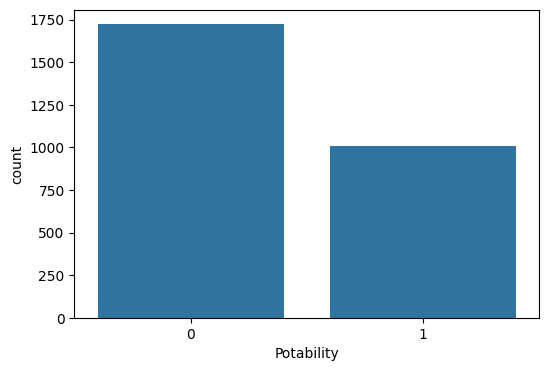

In [ ]:
# plot the distribution
plt.figure(figsize=(6,4), dpi=100)
sns.countplot(data=df, x=df["Potability"])
plt.show()

In [ ]:
# evaluate the percentage vs total
class_perc = 100 * (df["Potability"].value_counts()) / len(df)
class_perc

0    63.030747
1    36.969253
Name: Potability, dtype: float64

In [ ]:
# compare the relative size of the two classes
zero = df[df['Potability']==0].value_counts()
one = df[df['Potability']==1].value_counts()
class_one_perc = 100 * len(one) / len(zero)
class_one_perc

58.652729384436704

The two Classes are quite **imbalanced**: the size of the Class "1", infact, equals the 58.6% of the size of the Class "0".

To properly train the Machine Learning Model, it is necessary to resample and balance the Data Set for the training. To do this, I will use the **Stratified Sampling** Method.

Stratified sampling is a probability sampling technique used to ensure that a sample accurately reflects the characteristics of the entire population it represents. In simpler terms, it aims to create a miniature version of the population with the same proportions of different subgroups present in the whole population.

The **Stratified Sampling** Method, compared with a **Random Sampling** Method, has mainly two advantages:

- **Improved representativeness**: by dividing the population into subgroups (strata) based on relevant characteristics, stratified sampling ensures that each subgroup is adequately represented in the final sample. This is crucial when the subgroups have significant differences in the variable of interest, and a simple random sample might not capture these differences accurately.
- **Increased precision**: Stratification often leads to a more precise estimate of the population mean and other population parameters. This is because the variation within each stratum is likely to be smaller than the variation across the entire population. This reduced variation within subgroups translates to a smaller sample size needed to achieve the same level of precision compared to a simple random sample.

I will back on this point before to make the train test split.





### Correlations

Now I go deeper in the analysis of the correlations between the Features, looking for insights.

In [ ]:
# Evaluate correlations between Features and Labels
df.corr()["Potability"].sort_values()

Organic_carbon    -0.028592
Sulfate           -0.007302
Conductivity       0.000931
Hardness           0.003534
ph                 0.008302
Turbidity          0.008344
Chloramines        0.013535
Solids             0.014470
Trihalomethanes    0.016948
Potability         1.000000
Name: Potability, dtype: float64

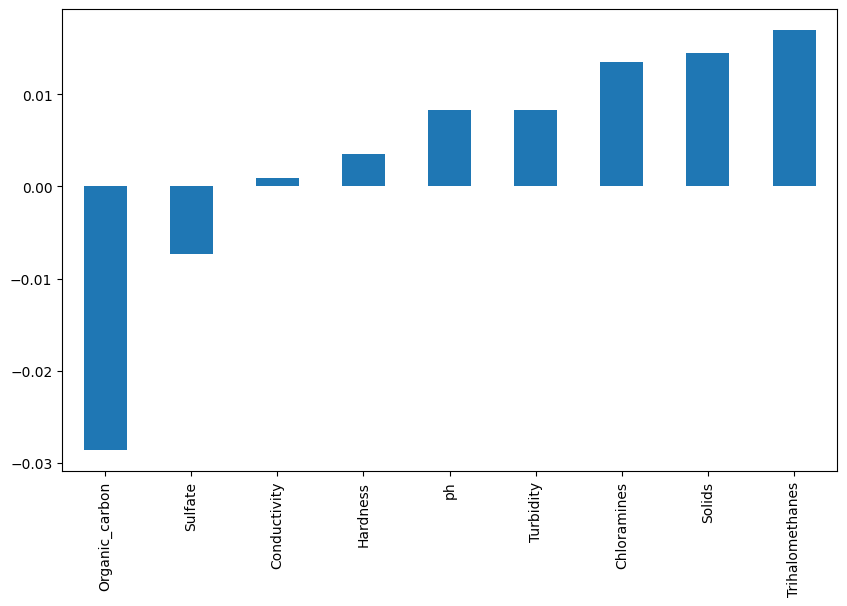

In [ ]:
# plot of the correlations Coefficients, to better understand
plt.figure(figsize=(10,6),dpi=100)
df.corr()["Potability"][:-1].sort_values().plot(kind="bar")
plt.show()

In general, all the Coefficients are quite low; for example, Conductivity and Hardness seem to have almost no influence on the Potability.

Let's plot a graphical summary.

<Figure size 1600x1600 with 0 Axes>

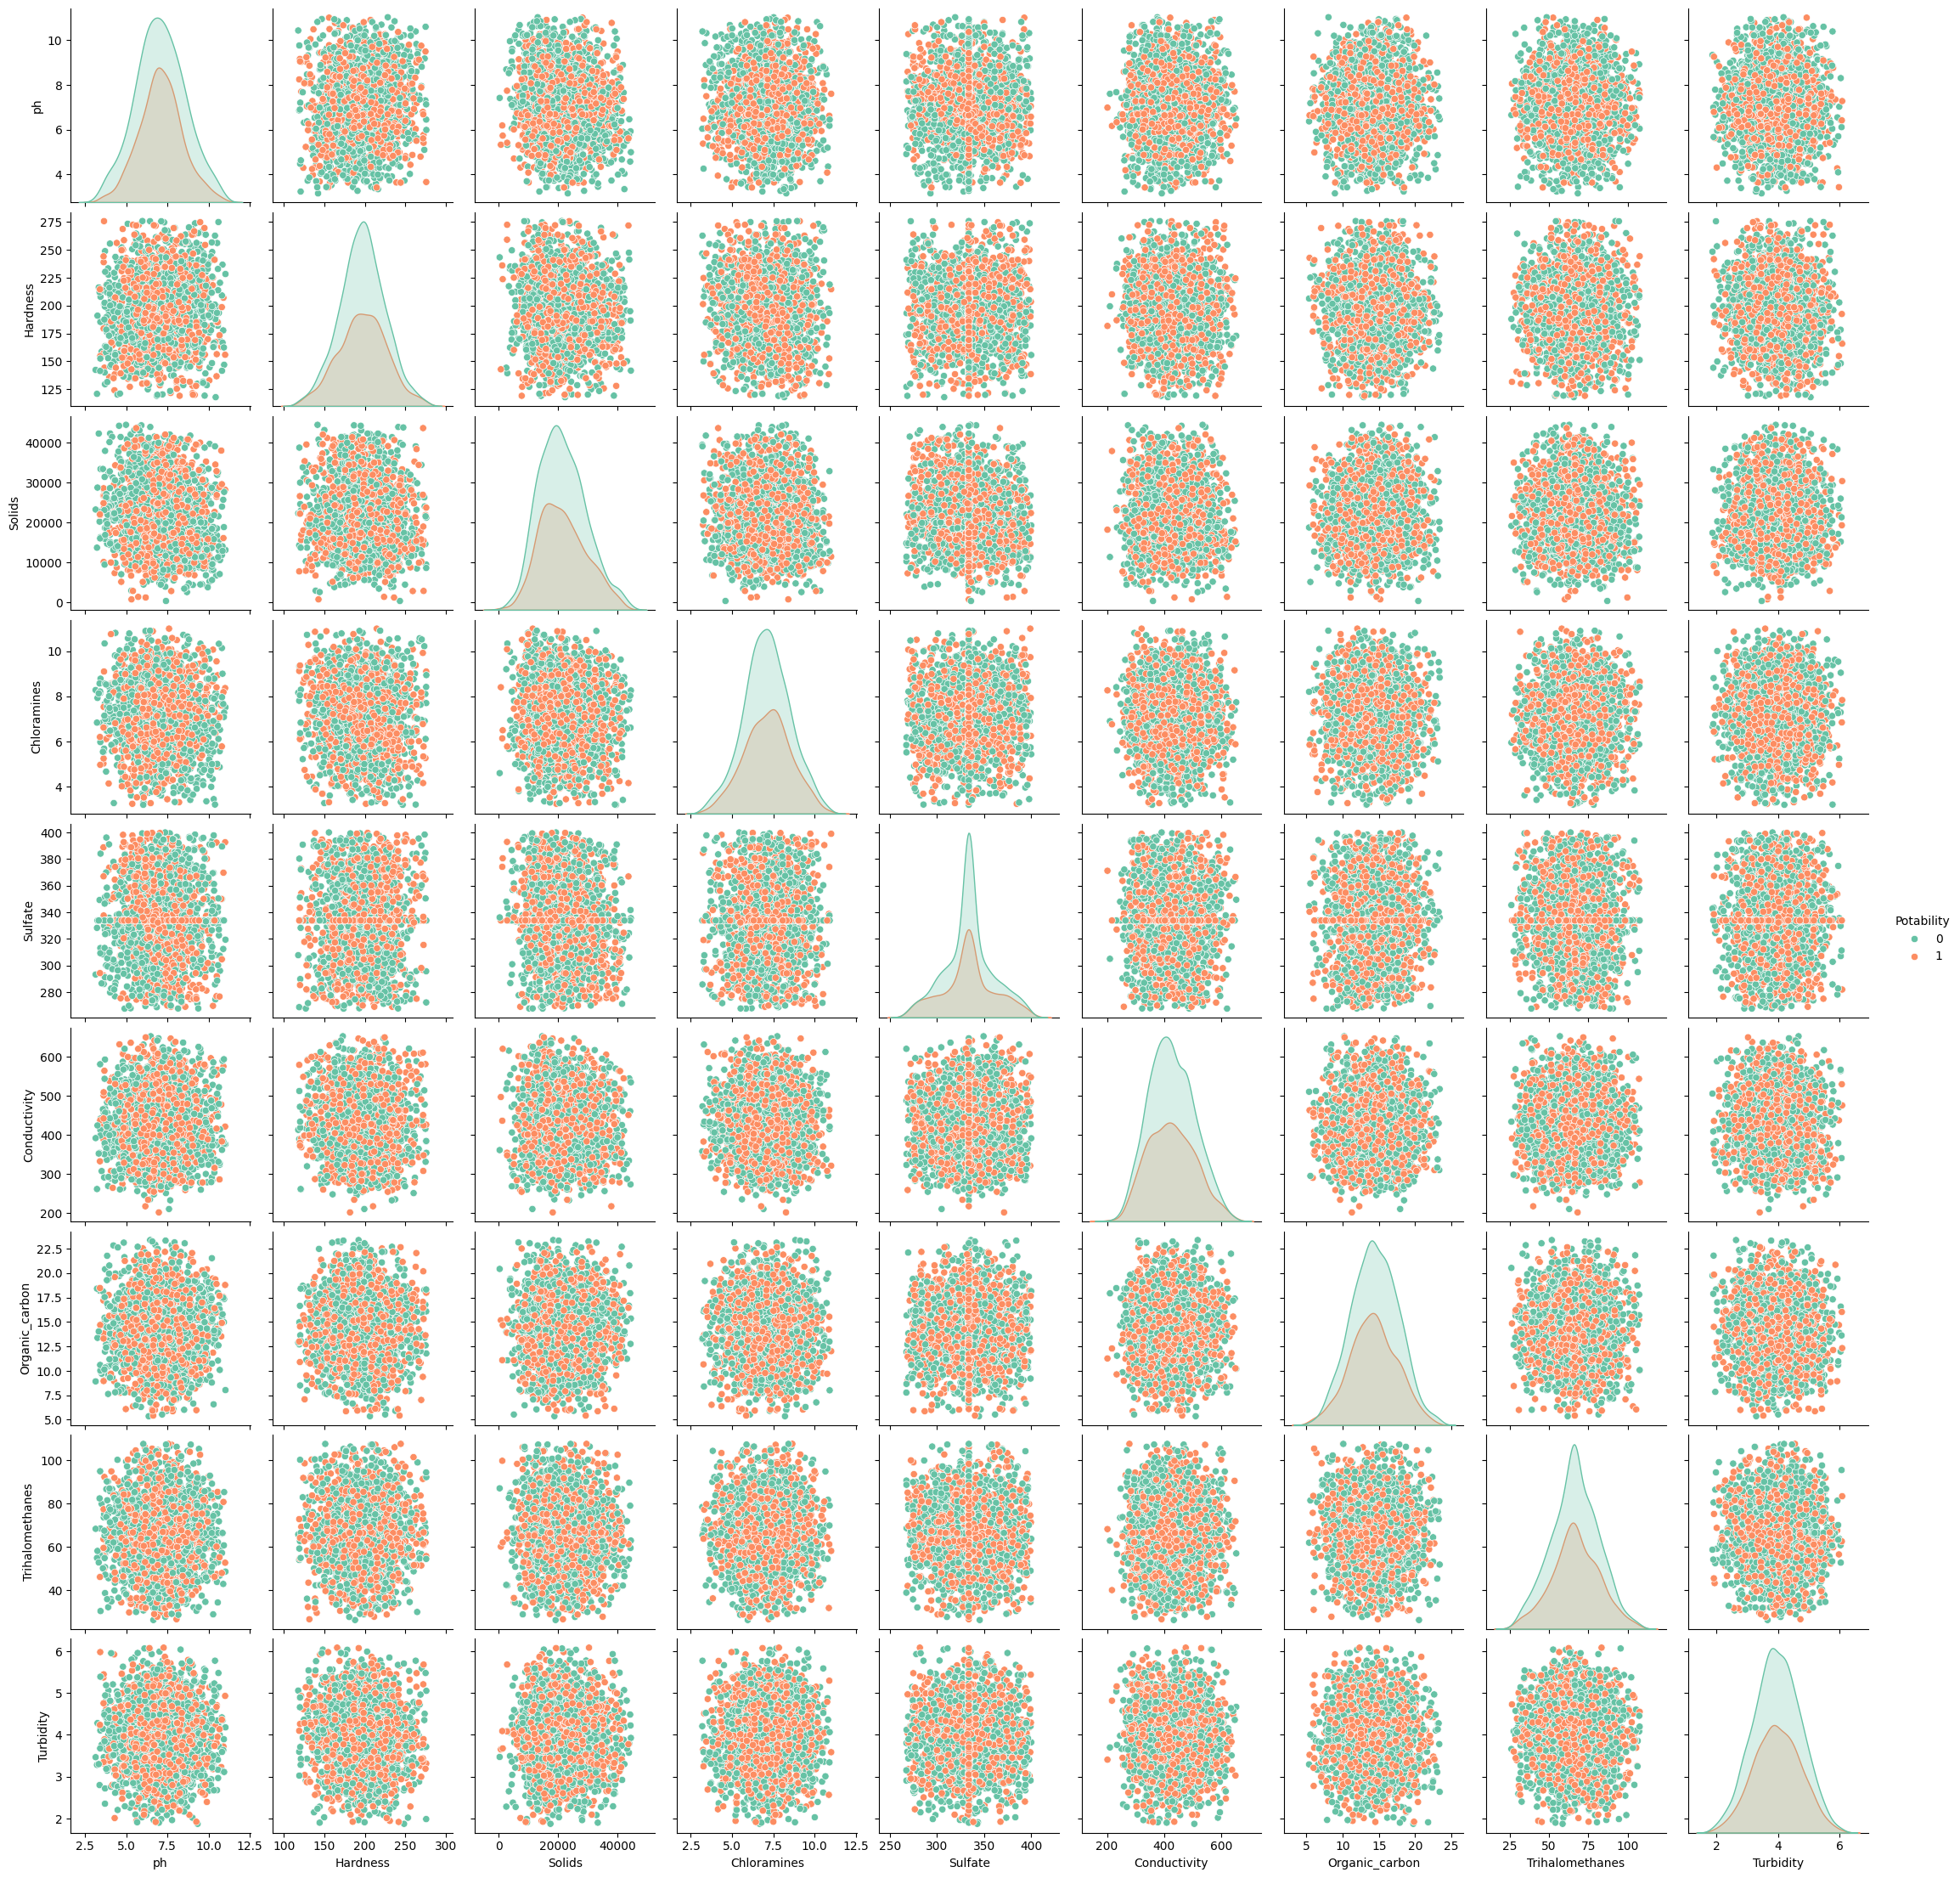

In [ ]:
# vgraphical summary of the correlations
plt.figure(figsize=(8, 8), dpi=200)
sns.pairplot(data=df, hue="Potability", palette="Set2")
plt.show()

The pairplot shows that, in general, all the correlations are quite sparse: this evidence doesn't give me any hints in order to consider to take out some features.

Now, let's plot a **clustermap** to see if there are some clusterisation hints.

<Figure size 500x500 with 0 Axes>

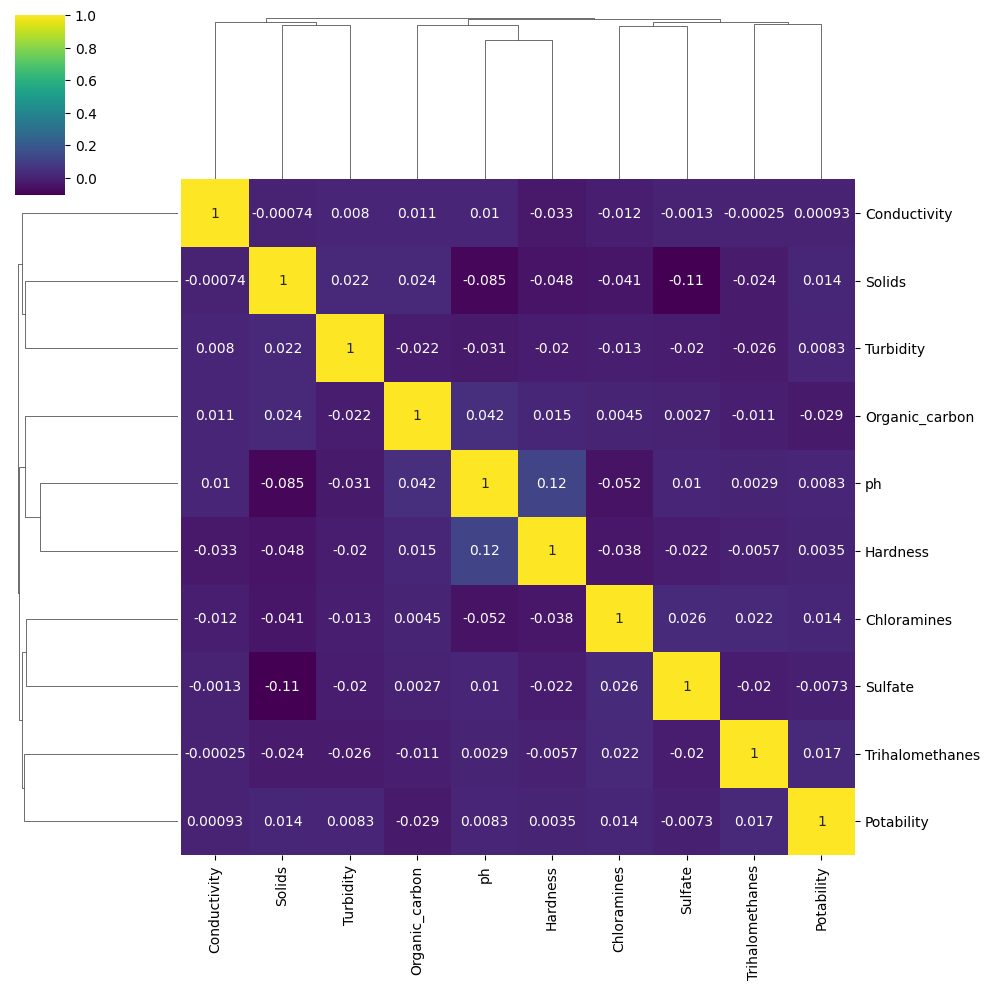

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)
sns.clustermap(df.corr(), cmap="viridis", annot=True)
plt.show()

The Matrix shows some possible clusters:
- Chloramines and Sulfates
- ph, hardness and Organic Carbon
- Solids, Turbidity and Conductivity

Considering that I am not a subject expert in the field of Potability, once again I don't have enough information in order to decide if it is possible to not consider any features.

To address this point, I will perform an hypothesis test.

### Chi Square Hypotesis test
To evaluate if all the Features are relevants for the prediction or if it is possible to select a subset, I am going to perform an Hypothesis test, using the Chi Square test. This test allows to test the **null hypothesis** that there are no relationship between the independent variables (Features) and the dependent variable (Label).

First, I proceed to map the labels for the Potability (the column contains integers) and replace the column
.


In [ ]:
# define a dictionary mapping codes to category labels
# assign 0 to not potable due to the correspondant Sulfate values > 250
category_map = {0: "not potable", 1: "potable"}

# apply the mapping to create a new column with labels
df['Potability'] = df['Potability'].map(category_map)

In [ ]:
# check the new column
df['Potability'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2732 entries, 0 to 3275
Series name: Potability
Non-Null Count  Dtype 
--------------  ----- 
2732 non-null   object
dtypes: object(1)
memory usage: 42.7+ KB


In [ ]:
df['Potability'].value_counts()

not potable    1722
potable        1010
Name: Potability, dtype: int64

I use chi2_contingency, that is designed to test whether two (or more) groups have the same distribution. Null hypothesis: the two groups have no significant difference.


In [ ]:
# import the library
from scipy.stats import chi2_contingency

# cycle through all the features
for var_indipendente in df.columns:
    if var_indipendente != "Potability":
        # create contingency table
        contingency_table = pd.crosstab(df["Potability"], df[var_indipendente])

        # calculate chi square
        chi2, p, dfr, expected = chi2_contingency(contingency_table)

        # print results
        print("Indipendent Variable:", var_indipendente)
        print("Chi square value:", chi2)
        print("p value:", p)
        print("Degrees of freedom:", dfr)
        print("Expected Frequencies Table:", expected)


        # interpretate the results
        if p < 0.05:
            print("The Chi-square test is significant. There is a significant relationship between the dependent variable and the variable {}.".format(var_indipendente))
            print("\n\n")
        else:
            print("The Chi-square test is not significant. There is no significant relationship between the dependent variable and the variable {}.".format(var_indipendente))

Indipendent Variable: ph
Chi square value: 2732.0
p value: 0.49100477303185897
Degrees of freedom: 2731
Expected Frequencies Table: [[0.63030747 0.63030747 0.63030747 ... 0.63030747 0.63030747 0.63030747]
 [0.36969253 0.36969253 0.36969253 ... 0.36969253 0.36969253 0.36969253]]
The Chi-square test is not significant. There is no significant relationship between the dependent variable and the variable ph.
Indipendent Variable: Hardness
Chi square value: 2732.0
p value: 0.49100477303185897
Degrees of freedom: 2731
Expected Frequencies Table: [[0.63030747 0.63030747 0.63030747 ... 0.63030747 0.63030747 0.63030747]
 [0.36969253 0.36969253 0.36969253 ... 0.36969253 0.36969253 0.36969253]]
The Chi-square test is not significant. There is no significant relationship between the dependent variable and the variable Hardness.
Indipendent Variable: Solids
Chi square value: 2732.0
p value: 0.49100477303185897
Degrees of freedom: 2731
Expected Frequencies Table: [[0.63030747 0.63030747 0.63030747 .

The results of the chi square test seems to confirm the null hypothesis. The lower value of p results for Trihalomethanes.

I keep all the features and let's see what will happen with the Machine Learning models.

<a id="4"> </a>

## 4. Data Preparation for Modeling

I proceed to prepare the data for the training and the test of the Model.


### Resampling and Train/Test Split
First of all, it is time to deal with the imbalancement: I will resample the Dataset using stratified sampling method and split the Train and Test DataSets.


In [ ]:
# import the sklearn library
from sklearn.model_selection import StratifiedShuffleSplit

# define the Target variable
target = df["Potability"]

Now I apply the method to resample and split the DataSet in order to have proportionals train and test data sets. I take a test size of 20%.

In [ ]:
# stratification of the model
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

for train_index, test_index in sss.split(df, target):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

In [ ]:
# balancement verification
print(train_df["Potability"].value_counts())
print(test_df["Potability"].value_counts())

not potable    1377
potable         808
Name: Potability, dtype: int64
not potable    345
potable        202
Name: Potability, dtype: int64


After the resampling, I split the variables into the Train and Test DataSets.

In [ ]:
# split the variables
X_train = train_df.drop("Potability", axis=1)
y_train = train_df["Potability"]
X_test = test_df.drop("Potability", axis=1)
y_test = test_df["Potability"]

### Data Scaling
It's time to scale the Data Set; I use the StandardScaler.

In [ ]:
# import the library
from sklearn.preprocessing import StandardScaler
# create an instance of the scaler and scale the data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

<a id="5"> </a>
## Model Development and Evaluation


### Way 1
Now, it is time to develop the Machine Learning Models and eveluate them. I will develop three Models, using different algorythms:
- **Logistic Regression**
- **RandomForest Classifier**
- **K-nearest neighbors**

#### Spot Check

I carry out a **spot check** on the selected models and select the best two according to **StratifiedKFold** k-fold cross validation.

After, I will tune the Hyperparameters on these two best models, using a **GridSearchCV**.

##### Logistic Regression

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# create a KFold instance
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# create an instance of the standard model
log_model = LogisticRegression()

# calculate the result
results = model_selection.cross_val_score(log_model, scaled_X_train, y_train, cv=kfold)
print(results.mean())



0.6302312429307527


##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# create a KFold instance
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# create an instance of the standard model
rfc = RandomForestClassifier()

# calculate the result
results = model_selection.cross_val_score(rfc, scaled_X_train, y_train, cv=kfold)
print(results.mean())

0.635731640903188


##### K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# create a KFold instance
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# create an instance of the standard model
knn_model = KNeighborsClassifier(n_neighbors=1)

# calculate the result
results = model_selection.cross_val_score(knn_model, scaled_X_train, y_train, cv=kfold)
print(results.mean())

0.5940597377571112


The Spot Check indicates as the two best models the **Logistic Regression** and the **Random Forest**, so for these two I will go on with the Hyperparameters tuning, prediction and evaluation.

#### Hyperparameters tuning and Evaluation
To properly tune the hyperparameters, I define a parameters grid and use the GridSearchCV.

##### Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# set the grid
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['lbfgs', 'newton-cg', 'liblinear']  # Solver algorithm
}

# create instances of the models
log_model = LogisticRegression(max_iter=5000)
grid = GridSearchCV(log_model, param_grid=lr_param_grid)

# fit the model
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']})

In [ ]:
# check for the best parameters
grid.best_params_

{'C': 0.001, 'solver': 'lbfgs'}

In [ ]:
# make predictions
lr_y_pred = grid.predict(scaled_X_test)

<Figure size 1600x1600 with 0 Axes>

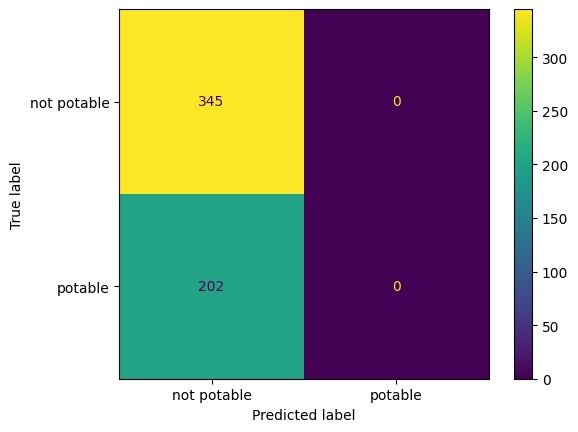

In [ ]:
# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# plot Confusion Matrix
plt.figure(figsize=(8, 8), dpi=200)
ConfusionMatrixDisplay.from_estimator(grid, scaled_X_test, y_test)
plt.show()

In [ ]:
# print Classification Report and Accuracy
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

 not potable       0.63      1.00      0.77       345
     potable       0.00      0.00      0.00       202

    accuracy                           0.63       547
   macro avg       0.32      0.50      0.39       547
weighted avg       0.40      0.63      0.49       547



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Random Forest

In [ ]:
# set the grid
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

param_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "bootstrap": bootstrap,
    "oob_score": oob_score,
}

# create instances of the models
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)

# fit the model
grid.fit(scaled_X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [ ]:
# check for the best parameters
grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 128, 'oob_score': True}

In [ ]:
# make predictions
rfc_y_pred = grid.predict(scaled_X_test)

<Figure size 1600x1600 with 0 Axes>

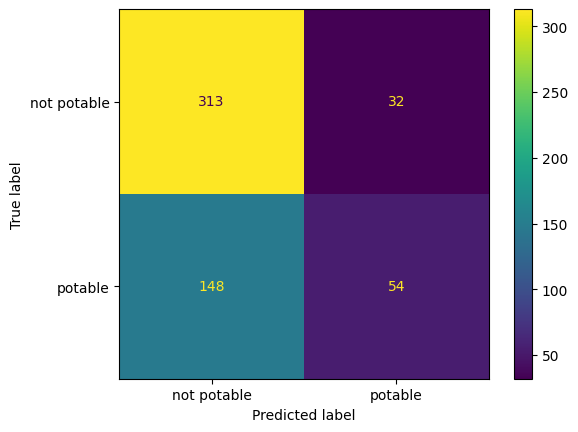

In [ ]:
# plot Confusion Matrix
plt.figure(figsize=(8, 8), dpi=200)
ConfusionMatrixDisplay.from_estimator(grid, scaled_X_test, y_test)
plt.show()

In [ ]:
# print Classification Report and Accuracy
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

 not potable       0.68      0.91      0.78       345
     potable       0.63      0.27      0.38       202

    accuracy                           0.67       547
   macro avg       0.65      0.59      0.58       547
weighted avg       0.66      0.67      0.63       547



##### Evaluations

Both the Models performs quite bad: mainly, the two models seem to have difficulties with the prediction of the Potable class, and the performance is worst for the Logistic Regression.

I can suppose that this results is due to the poor correlation showed between the Features and the labels.

### Way 2
In this way, I am going to select only 3 Features to develop the models. Following the chi test results and the clustermap, I make the assumption to select as Features:

- **Trihalomethanes**
- **Organic_carbon**
- **Conductivity**


Once again, I develop the Machine Learning Models and eveluate them. I will develop three Models, using different algorythms:
- **Logistic Regression**
- **RandomForest Classifier**
- **K-nearest neighbors**

##### Data Set Preparation

In [ ]:
selected_features = ['Trihalomethanes', 'Organic_carbon', 'Conductivity']

w2_scaled_X_train = train_df[selected_features]
w2_scaled_X_test = test_df[selected_features]

#### Spot Check

I carry out a **spot check** on the selected models and select the best two according to **StratifiedKFold** k-fold cross validation.

After, I will tune the Hyperparameters on these two best models, using a **GridSearchCV**.

##### Logistic Regression

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# create a KFold instance
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# create an instance of the standard model
log_model = LogisticRegression()

# calculate the result
results = model_selection.cross_val_score(log_model, w2_scaled_X_train, y_train, cv=kfold)
print(results.mean())



0.6302312429307527


##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# create a KFold instance
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# create an instance of the standard model
rfc = RandomForestClassifier()

# calculate the result
results = model_selection.cross_val_score(rfc, w2_scaled_X_train, y_train, cv=kfold)
print(results.mean())

0.5739621297809057


##### K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# create a KFold instance
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# create an instance of the standard model
knn_model = KNeighborsClassifier(n_neighbors=1)

# calculate the result
results = model_selection.cross_val_score(knn_model, w2_scaled_X_train, y_train, cv=kfold)
print(results.mean())

0.5446189937581165


Also in this Way 2, the Spot Check indicates as the two best models the **Logistic Regression** and the **Random Forest**, so for these two I will go on with the Hyperparameters tuning, prediction and evaluation.

#### Hyperparameters tuning and Evaluation
To properly tune the hyperparameters, I define a parameters grid and use the GridSearchCV.

##### Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# set the grid
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['lbfgs', 'newton-cg', 'liblinear']  # Solver algorithm
}

# create instances of the models
log_model = LogisticRegression(max_iter=5000)
grid = GridSearchCV(log_model, param_grid=lr_param_grid)

# fit the model
grid.fit(w2_scaled_X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']})

In [ ]:
# check for the best parameters
grid.best_params_

{'C': 0.001, 'solver': 'lbfgs'}

In [ ]:
# make predictions
lr_y_pred = grid.predict(w2_scaled_X_test)

<Figure size 1600x1600 with 0 Axes>

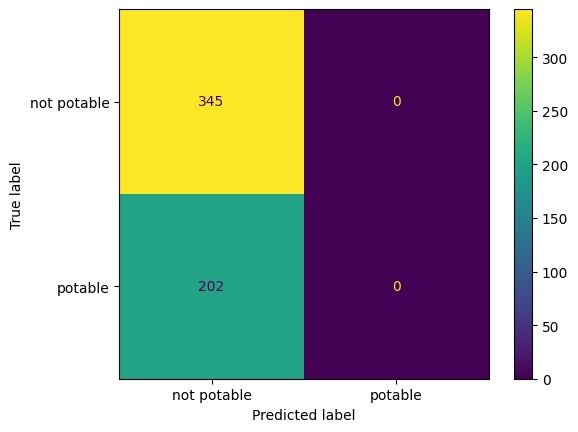

In [ ]:
# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# plot Confusion Matrix
plt.figure(figsize=(8, 8), dpi=200)
ConfusionMatrixDisplay.from_estimator(grid, w2_scaled_X_test, y_test)
plt.show()

In [ ]:
# print Classification Report and Accuracy
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

 not potable       0.63      1.00      0.77       345
     potable       0.00      0.00      0.00       202

    accuracy                           0.63       547
   macro avg       0.32      0.50      0.39       547
weighted avg       0.40      0.63      0.49       547



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Random Forest

In [ ]:
# set the grid
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

param_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "bootstrap": bootstrap,
    "oob_score": oob_score,
}

# create instances of the models
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)

# fit the model
grid.fit(w2_scaled_X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [ ]:
# check for the best parameters
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': False}

In [ ]:
# make predictions
rfc_y_pred = grid.predict(w2_scaled_X_test)

<Figure size 1600x1600 with 0 Axes>

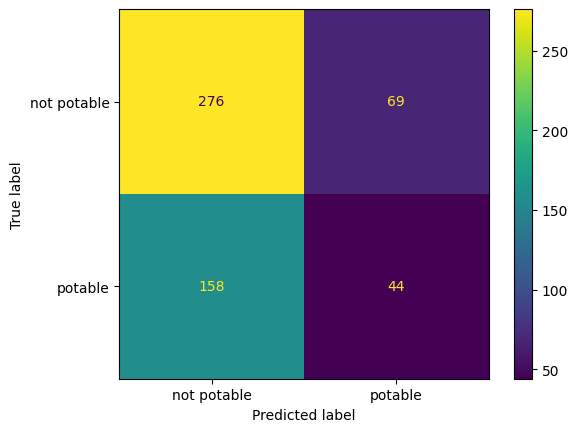

In [ ]:
# plot Confusion Matrix
plt.figure(figsize=(8, 8), dpi=200)
ConfusionMatrixDisplay.from_estimator(grid, w2_scaled_X_test, y_test)
plt.show()

In [ ]:
# print Classification Report and Accuracy
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

 not potable       0.68      0.91      0.78       345
     potable       0.63      0.27      0.38       202

    accuracy                           0.67       547
   macro avg       0.65      0.59      0.58       547
weighted avg       0.66      0.67      0.63       547



##### Evaluations

Also following the Way 2, again the Models performs quite bad.



<a id="6"> </a>

## 6. Conclusions

In general, the performances of the tested models were not good: in fact, both in way 1 and in way 2, the evaluation metrics show rather low scores.

In both cases, the Random Forest model performed slightly better, but neither proved satisfactory.

The Confusion Matrices show that the distribution of the forecast results changes slightly between way 1 and way 2, but the total score does not change.

I can hypothesize that the poor performance is due to the fact that the Features have low correlation coefficients compared to the Labels; or maybe some of the hypotheses I made when managing null values or outliers were too risky.